# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [81]:
pip install seaborn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [83]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns
import numpy as np
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

merged_data = pd.merge(study_results,mouse_metadata, on="Mouse ID")
# Display the data table for preview
merged_data.head(5) 




,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [28]:
# Checking the number of mice.
number=merged_data["Mouse ID"].nunique()
print(f"number of mice is ",number )


number of mice is  249


In [48]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Find duplicate mice based on Mouse ID and Timepoint
duplicate_mice= merged_data[merged_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Get the duplicate Mouse IDs
duplicate_mouse_ids = duplicate_mice['Mouse ID'].unique()

# Convert to the desired format
output_array = np.array(duplicate_mouse_ids, dtype=object)

print(f"array({output_array}, dtype=object)")

array(['g989'], dtype=object)


In [30]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = merged_data[merged_data['Mouse ID'].isin(duplicate_mouse_ids)]

duplicate_mouse_data.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26


In [94]:

# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Find duplicate mice based on Mouse ID and Timepoint
duplicate_mice = merged_data[merged_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Get the unique duplicate Mouse IDs
duplicate_mouse_ids = duplicate_mice['Mouse ID'].unique()

# Create a clean DataFrame by dropping the duplicate mouse data
clean_data = merged_data[~merged_data['Mouse ID'].isin(duplicate_mouse_ids)]

# Display the clean DataFrame for preview
print(clean_data.head)

<bound method NDFrame.head of      Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0        b128          0           45.000000                 0    Capomulin   
1        b128          5           45.651331                 0    Capomulin   
2        b128         10           43.270852                 0    Capomulin   
3        b128         15           43.784893                 0    Capomulin   
4        b128         20           42.731552                 0    Capomulin   
...       ...        ...                 ...               ...          ...   
1888     m601         25           33.118756                 1    Capomulin   
1889     m601         30           31.758275                 1    Capomulin   
1890     m601         35           30.834357                 1    Capomulin   
1891     m601         40           31.378045                 1    Capomulin   
1892     m601         45           28.430964                 1    Capomulin   

         Sex  Age_mon

In [66]:
# Checking the number of mice in the clean DataFrame.

num_unique_mice = clean_data['Mouse ID'].nunique()

print("Number of unique mice:", num_unique_mice)

Number of unique mice: 248


## Summary Statistics

In [101]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
# Group the clean data by drug regimen and calculate summary statistics
summary_stats = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename the columns for better readability
summary_stats.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']

# Display the summary statistics DataFrame
print(summary_stats)

                   Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.320930  50.446266  43.852013            6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


In [34]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_advanced = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem']) \
                                      .rename(columns={'mean': 'Mean', 'median': 'Median', 'var': 'Variance', 'std': 'Standard Deviation', 'sem': 'SEM'})

# Display the advanced summary statistics DataFrame
print(summary_stats_advanced)

                   Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.458254  50.854632  44.053659            6.637293  0.540135
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


## Bar and Pie Charts

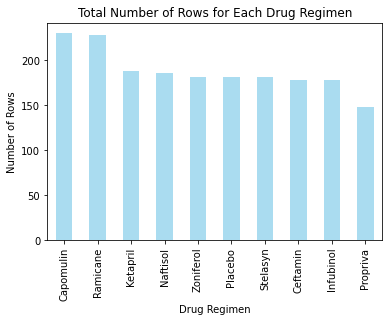

In [53]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Group data by drug regimen and count the number of rows in each group
regimen_counts = clean_data['Drug Regimen'].value_counts()

# Create a bar plot using Pandas
regimen_counts.plot(kind='bar', color='skyblue', alpha=0.7)

# Set plot labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.title('Total Number of Rows for Each Drug Regimen')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

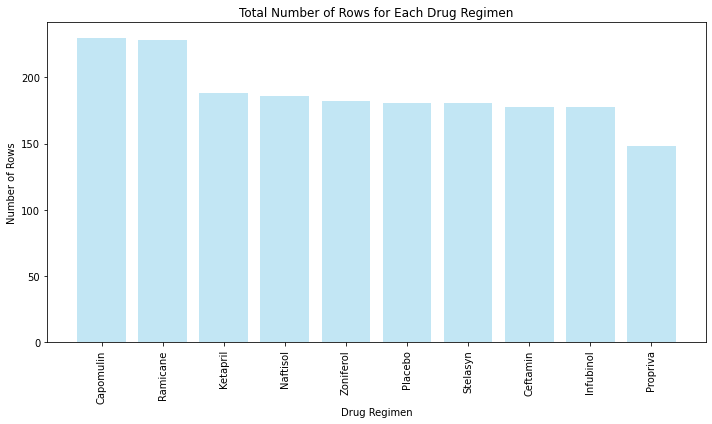

In [68]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Group data by drug regimen and count the number of rows in each group
regimen_counts = clean_data['Drug Regimen'].value_counts()

# Extract data for plotting
regimens = regimen_counts.index
counts = regimen_counts.values

# Create a bar plot using pyplot
plt.figure(figsize=(10, 6))
plt.bar(regimens, counts, color='skyblue', alpha=0.5)
# Set plot labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.title('Total Number of Rows for Each Drug Regimen')
# Rotate x-axis labels for better readability
plt.xticks(rotation=90)
# Display the plot
plt.tight_layout()
plt.show()

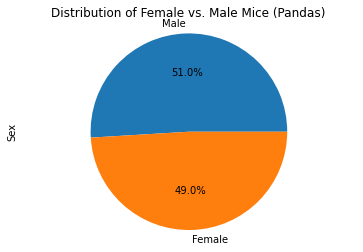

In [55]:
# Count the distribution of female and male mice
gender_distribution = clean_data["Sex"].value_counts()

# Generate the pie chart using Pandas
gender_distribution.plot(kind='pie', autopct='%1.1f%%', title='Distribution of Female vs. Male Mice (Pandas)')
plt.axis('equal')
plt.show()

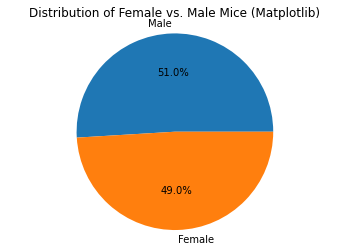

In [57]:
# Count the distribution of female and male mice
gender_distribution = clean_data["Sex"].value_counts()
# Generate the pie chart using Matplotlib
plt.pie(gender_distribution.values, labels=gender_distribution.index, autopct='%1.1f%%')
plt.title('Distribution of Female vs. Male Mice (Matplotlib)')
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [77]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# List of treatment regimens 
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Step 1: Create a grouped DataFrame for the last time point
last_timepoint = clean_data.groupby("Mouse ID")["Timepoint"].max()
last_timepoint_df = last_timepoint.reset_index()

# Step 2: Merge the grouped DataFrame with the original cleaned DataFrame
merged_last_timepoint = pd.merge(last_timepoint_df, clean_data, on=["Mouse ID", "Timepoint"])

# Step 3: Loop through treatments and collect final tumor volumes
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_volumes = []

for treatment in treatments:
    volumes = merged_last_timepoint.loc[merged_last_timepoint["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    tumor_volumes.append(volumes)

# Step 4: Calculate quartiles, IQR, and identify potential outliers
for i, treatment in enumerate(treatments):
    quartiles = tumor_volumes[i].quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    
    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 * iqr
    
    outliers = tumor_volumes[i][(tumor_volumes[i] < lower_bound) | (tumor_volumes[i] > upper_bound)]
    
    print(f"{treatment}'s potential outliers: {outliers}")    
    


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


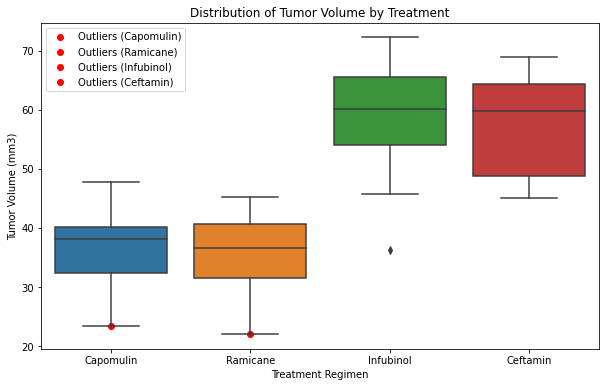

In [85]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Create a box plot using seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x="Drug Regimen", y="Tumor Volume (mm3)", data=merged_last_timepoint, order=treatments)

# Step 6: Add title and labels
plt.title("Distribution of Tumor Volume by Treatment")
plt.xlabel("Treatment Regimen")
plt.ylabel("Tumor Volume (mm3)")

# Display the potential outliers (optional)
for i, treatment in enumerate(treatments):
    outliers = tumor_volumes[i][(tumor_volumes[i] < lower_bound) | (tumor_volumes[i] > upper_bound)]
    plt.scatter([i] * len(outliers), outliers, c='red', marker='o', label=f'Outliers ({treatment})')

# Add legend
plt.legend()

# Show the plot
plt.show()


## Line and Scatter Plots

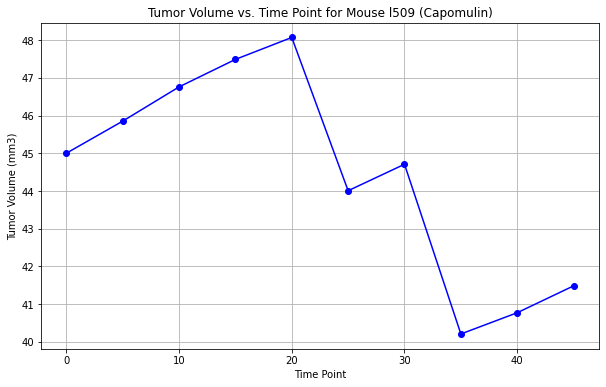

In [97]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = "l509"
treatment = "Capomulin"

# Filter the data for the specific mouse and treatment
mouse_data = clean_data[(clean_data["Mouse ID"] == mouse_id) & (clean_data["Drug Regimen"] == treatment)]

# Create a line plot of tumor volume vs. time point
plt.figure(figsize=(10, 6))
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"], marker='o', color='b')

# Add title and labels
plt.title(f"Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin)")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")

# Show the plot
plt.grid(True)
plt.show()

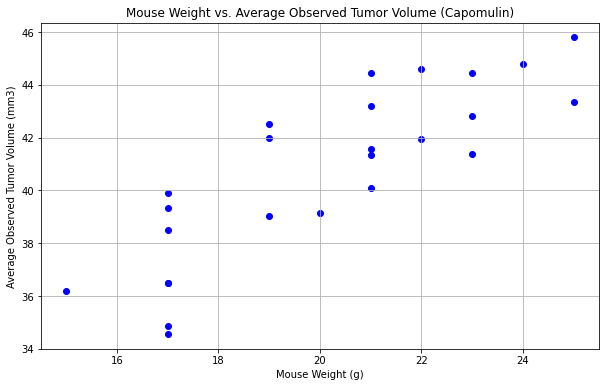

In [99]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Generate scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(unique_data["Weight (g)"], unique_data["Tumor Volume (mm3)_avg"], color="b", marker="o")
# Add title and labels
plt.title("Mouse Weight vs. Average Observed Tumor Volume (Capomulin)")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Observed Tumor Volume (mm3)")

# Show the plot
plt.grid(True)
plt.show()


## Correlation and Regression

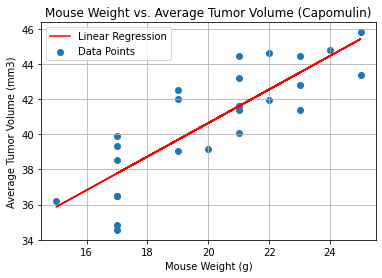

In [100]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

plt.scatter(mouse_weights, average_tumor_volume, marker='o', label='Data Points')


regression_line = slope * mouse_weights + intercept
plt.plot(mouse_weights, regression_line, color='red', label='Linear Regression')

plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()
plt.grid(True)
plt.show()
